<a href="https://colab.research.google.com/github/mohdsajid0506/bharat-intern/blob/main/stock%20prediction-Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('/content/BTC-USD.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-09,7561.795410,7618.091797,7365.985352,7400.899414,7400.899414,17872021272
2019-12-10,7397.134277,7424.022949,7246.043945,7278.119629,7278.119629,18249031194
2019-12-11,7277.197754,7324.156250,7195.527344,7217.427246,7217.427246,16350490689
2019-12-12,7216.738770,7266.639648,7164.741211,7243.134277,7243.134277,18927080224
2019-12-13,7244.662109,7293.560547,7227.122559,7269.684570,7269.684570,17125736940


In [5]:
df = df.drop(['High','Low','Adj Close','Volume','Close'], axis=1)
df.head()

,Open
Date,
2019-12-09,7561.795410
2019-12-10,7397.134277
2019-12-11,7277.197754
2019-12-12,7216.738770
2019-12-13,7244.662109


In [6]:
dataset = df.values
dataset = dataset.astype('float64')
dataset[:5]

array([[7561.79541 ],
       [7397.134277],
       [7277.197754],
       [7216.73877 ],
       [7244.662109]])

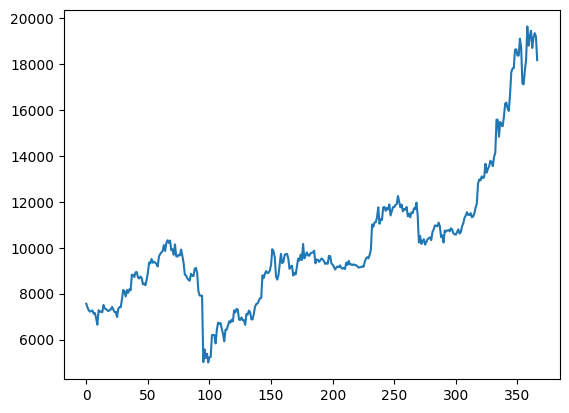

In [7]:
plt.plot(dataset)
plt.show()

In [8]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
print(dataset[:5],'\n')
print(dataset.shape)

[[0.17491517]
 [0.16366105]
 [0.15546373]
 [0.15133153]
 [0.15324001]] 

(367, 1)


In [9]:
# lookback -> timestep
def create_dataset(dataset,look_back):
    data_x, data_y = [],[] #data_x is data and data_y is label
    for i in range(len(dataset)-look_back-1): #we want if data be beyond len(sequendatasetce), the command will not continue
        data_x.append(dataset[i:(i+look_back),0])
        data_y.append(dataset[i+look_back,0])
    return np.array(data_x) , np.array(data_y)

In [10]:
train_size = int(len(dataset) * 0.90)
train , test = dataset[0:train_size,:] , dataset[train_size:len(dataset),:]
print(train.shape)
print(test.shape)

(330, 1)
(37, 1)


In [11]:
train[:3]

array([[0.17491517],
       [0.16366105],
       [0.15546373]])

In [12]:
n_steps = 5 #timestep or look_up

train_x , train_y = create_dataset(train, n_steps)
test_x , test_y = create_dataset(test, n_steps)

In [13]:
print(train_x.shape , train_y.shape)
print(test_x.shape , test_y.shape)

(324, 5) (324,)
(31, 5) (31,)


In [14]:
train_y[:3]

array([0.1548968 , 0.14500949, 0.14702049])

In [15]:
for i in range(len(test_x)):
    print(test_x[i],test_y[i])

# print(train_x[:5],'\n')
# print(train_y[:5])

[0.58422262 0.61156401 0.62408829 0.72291798 0.72197147] 0.6719326887466186
[0.61156401 0.62408829 0.72291798 0.72197147 0.67193269] 0.7160741246063909
[0.62408829 0.72291798 0.72197147 0.67193269 0.71607412] 0.7060103428599764
[0.72291798 0.72197147 0.67193269 0.71607412 0.70601034] 0.7031779415298287
[0.72197147 0.67193269 0.71607412 0.70601034 0.70317794] 0.7312268978049619
[0.67193269 0.71607412 0.70601034 0.70317794 0.7312269 ] 0.7705361779613369
[0.71607412 0.70601034 0.70317794 0.7312269  0.77053618] 0.7733635734106943
[0.70601034 0.70317794 0.7312269  0.77053618 0.77336357] 0.7562994164960621
[0.70317794 0.7312269  0.77053618 0.77336357 0.75629942] 0.7486060922221522
[0.7312269  0.77053618 0.77336357 0.75629942 0.74860609] 0.7985073092686736
[0.77053618 0.77336357 0.75629942 0.74860609 0.79850731] 0.8640863843675424
[0.77336357 0.75629942 0.74860609 0.79850731 0.86408638] 0.8749310187925237
[0.75629942 0.74860609 0.79850731 0.86408638 0.87493102] 0.8758347494343481
[0.74860609 

In [16]:
trainxr = np.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))
testxr = np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))

print(trainxr.shape)
print(testxr.shape)

(324, 5, 1)
(31, 5, 1)


In [17]:
train_x = trainxr
test_x = testxr

In [18]:
'''
from keras.optimizers import Adam
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
'''

'\nfrom keras.optimizers import Adam\nlearning_rate = 0.0001\noptimizer = Adam(learning_rate=learning_rate)\n'

In [19]:
'''
from keras.optimizers import Adam
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
'''


n_features = 1
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape=(n_steps, n_features)))
model.add(Dense(1)) #n-output
model.compile(optimizer='adam',loss='mse')

In [20]:
model.fit(train_x, train_y, epochs=50, shuffle=False, batch_size=2)

Epoch 1/50
162/162 [==============================] - 3s 4ms/step - loss: 0.0040
Epoch 2/50
162/162 [==============================] - 1s 4ms/step - loss: 0.0050
Epoch 3/50
162/162 [==============================] - 1s 7ms/step - loss: 0.0034
Epoch 4/50
162/162 [==============================] - 1s 6ms/step - loss: 0.0024
Epoch 5/50
162/162 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 6/50
162/162 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 7/50
162/162 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 8/50
162/162 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 9/50
162/162 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 10/50
162/162 [==============================] - 1s 4ms/step - loss: 0.0012
Epoch 11/50
162/162 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 12/50
162/162 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 13/50
162/162 [====

In [21]:
model.save('/content/drive/MyDrive/savedata')

In [22]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/savedata')

In [23]:
predict_train = new_model.predict(train_x)
predict_test = new_model.predict(test_x)
print('predicted y(train):', np.reshape(predict_train[:5],-1))
print('real y(train):', train_y[:5])

1/1 [==============================] - 0s 71ms/step
predicted y(train): [0.19935045 0.20128483 0.19337782 0.19349088 0.18177408]
real y(train): [0.1548968  0.14500949 0.14702049 0.13182367 0.11243925]


In [24]:
predict_train = scaler.inverse_transform(predict_train)
trainy = scaler.inverse_transform([train_y])

predict_test = scaler.inverse_transform(predict_test)
testy = scaler.inverse_transform([test_y])

In [25]:
print(predict_train[:5])

[[7919.3125]
 [7947.6147]
 [7831.9263]
 [7833.5806]
 [7662.149 ]]


In [26]:
Answer1 = pd.DataFrame({
    "Predicted": predict_train.ravel(),
    "real": trainy.ravel()
})
Answer1.head()

,Predicted,real
0,7919.312500,7268.902832
1,7947.614746,7124.239746
2,7831.926270,7153.663086
3,7833.580566,6931.315430
4,7662.148926,6647.698242


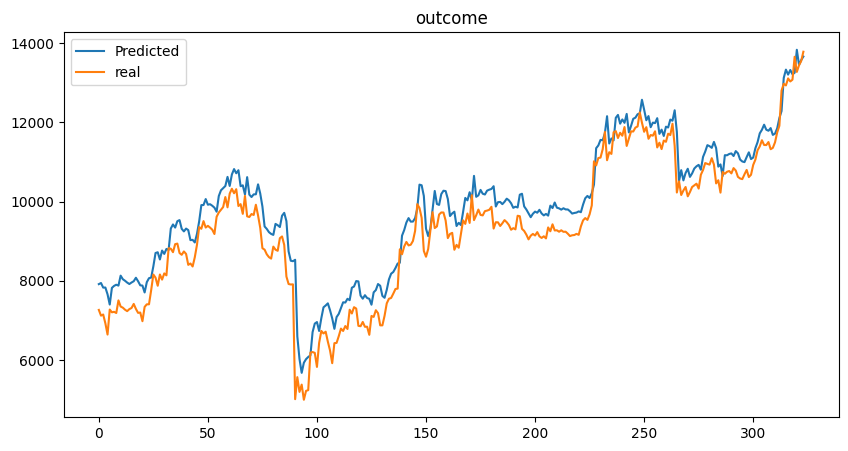

In [27]:
Answer1.plot(title="outcome", figsize=(10,5));

In [28]:
Answer2 = pd.DataFrame({
    "Predicted": predict_test.ravel(),
    "real": testy.ravel()
})
Answer2.head()

,Predicted,real
0,15657.217773,14833.753906
1,14703.906250,15479.595703
2,15371.144531,15332.350586
3,15124.586914,15290.909180
4,15129.779297,15701.298828


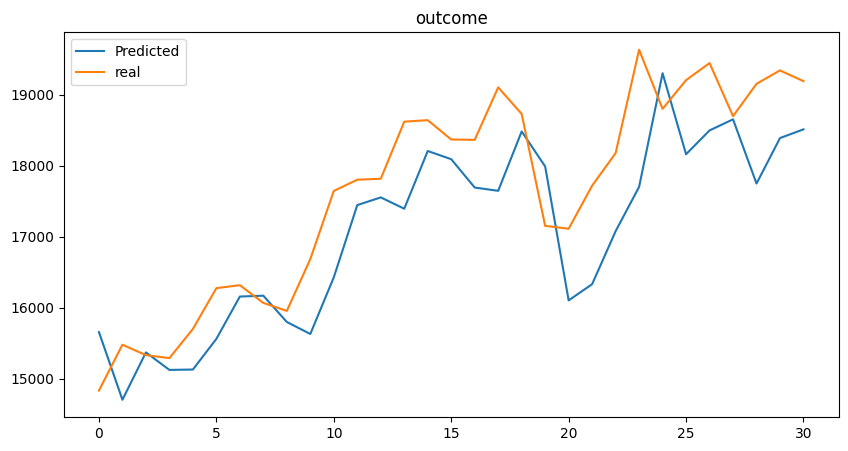

In [29]:
#test
Answer2.plot(title="outcome", figsize=(10,5));

In [30]:
model.evaluate(test_x, test_y)

1/1 [==============================] - 1s 684ms/step - loss: 0.0036


0.0035513038747012615

In [31]:
train_score = math.sqrt(mean_squared_error(trainy.reshape(-1),predict_train))
print('rmse ', train_score)
test_score = math.sqrt(mean_squared_error(test_y.reshape(-1),predict_test))
print('rmse ', test_score)

rmse  611.1436522577067
rmse  17101.620927157564


In [32]:
test_x.shape , test_y.shape

((31, 5, 1), (31,))

In [33]:
test_ = array([0.0272989,  0.03199121, 0.03083671, 0.02082067, 0.03542986])
test_ = test_.reshape(1,n_steps,n_features)
test_.shape


(1, 5, 1)

In [34]:
y_hat = model.predict(test_)
y_hat

1/1 [==============================] - 0s 181ms/step


array([[0.0922686]], dtype=float32)

In [35]:
y_hat = scaler.inverse_transform(y_hat)
y_hat

array([[6352.5776]], dtype=float32)